In [2]:
import os
import sys
sys.path.append(os.path.abspath("../src"))
sys.path.append(os.path.abspath("../results"))
from utils_result import get_loss,get_standardised_loss

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np

In [4]:
loss = get_loss("../final_results/data_experiment/","subset","test_loss")

In [5]:
loss

subset_1084    6.993248
subset_1355    6.932253
subset_1626    7.017747
subset_1897    6.770196
subset_2168    6.920627
subset_2439    6.737538
subset_271     7.056829
subset_2710    6.820821
subset_542     7.837854
subset_813     7.315225
dtype: float64

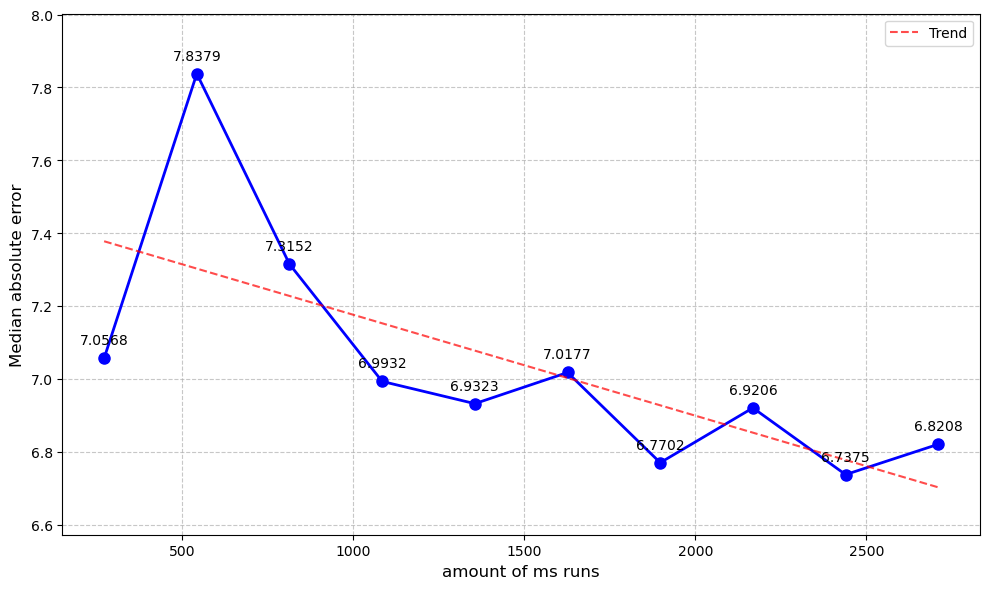

In [6]:
# Extract pool sizes from index and create a new series with numeric indices
pool_sizes = pd.Series(
    [int(re.search(r'subset_(\d+)', x).group(1)) for x in loss.index],
    index=loss.index
)
# Sort by pool size
sorted_indices = pool_sizes.argsort()
sorted_sizes = pool_sizes.iloc[sorted_indices].values
sorted_values = loss.iloc[sorted_indices].values

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(sorted_sizes, sorted_values, marker='o', linestyle='-', color='blue', 
         linewidth=2, markersize=8)

# Add labels and title
plt.xlabel('amount of ms runs', fontsize=12)
plt.ylabel('Median absolute error', fontsize=12)
plt.title('', fontsize=14)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Customize y-axis limits with appropriate margin
y_min = min(sorted_values)
y_max = max(sorted_values)
y_range = y_max - y_min
margin = y_range * 0.15  # 15% margin on each side
plt.ylim(y_min - margin, y_max + margin)

# Annotate each point with its value
for size, value in zip(sorted_sizes, sorted_values):
    plt.annotate(f'{value:.4f}', 
                 (size, value),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center')

# Add trend line
z = np.polyfit(sorted_sizes, sorted_values, 1)
p = np.poly1d(z)
plt.plot(sorted_sizes, p(sorted_sizes), "r--", alpha=0.7, label='Trend')

plt.legend()
plt.tight_layout()

# Save the figure (optional)
# plt.savefig('pool_size_effect.png', dpi=300)
plt.show()